# Project 3: Reddit

### Data Cleaning and EDA

In [168]:
#import libraries
import pandas as pd 
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

**Read in both Violinist and Cello**

In [169]:
violinist_df = pd.read_csv('../data/Violinist.csv')
cello_df = pd.read_csv('../data/Cello.csv')

**Violinist dataframe cleaning and EDA**

In [170]:
violinist_df.head(3)

,Unnamed: 0,author_flair_text,created_utc,id,selftext,subreddit,title
0,0,Advanced,1623955275,o24eoj,[https://www.youtube.com/watch?v=PONbtxcPcKQ](...,violinist,"Ysaÿe violin concerto in E minor, the first mo..."
1,1,NaN,1623954118,o23xyv,I've been struggling with my vibrato and am lo...,violinist,Video performance examples with great vibrato
2,2,Adult Beginner,1623944890,o20e4w,My current rhythm exercise is in 6/8 time.\n\n...,violinist,Counting time (6/8)


**Drop Unnamed: 0 column**

In [171]:
violinist_df.drop('Unnamed: 0', axis=1, inplace=True)

**Rename the columns**

In [172]:
rename_columns_dict = {
    'id':'author_id',
    'created_utc' : 'posted_on',
    'author_flair_text': 'author_tag', 
    'title': 'post_title',
    'selftext':'post_description',
    'subreddit':'subreddit_name'}

In [173]:
violinist_df.rename(columns=rename_columns_dict, inplace=True) 

**Change column order**

In [174]:
# Moving the subreddit column to the end for the eventual merge with the Cello dataframe
# This will be the y_value
violinist_df = violinist_df[['author_id','posted_on','author_tag','post_title','post_description','subreddit_name']]

**Convert unix/epoch time to a regular time stamp in UTC**

In [175]:
#https://www.w3resource.com/python-exercises/pandas/time-series/pandas-time-series-exercise-17.php
violinist_df['posted_on']=pd.to_datetime(violinist_df['posted_on'], unit='s')
violinist_df.head(3)

,author_id,posted_on,author_tag,post_title,post_description,subreddit_name
0,o24eoj,2021-06-17 18:41:15,Advanced,"Ysaÿe violin concerto in E minor, the first mo...",[https://www.youtube.com/watch?v=PONbtxcPcKQ](...,violinist
1,o23xyv,2021-06-17 18:21:58,NaN,Video performance examples with great vibrato,I've been struggling with my vibrato and am lo...,violinist
2,o20e4w,2021-06-17 15:48:10,Adult Beginner,Counting time (6/8),My current rhythm exercise is in 6/8 time.\n\n...,violinist


**check data types**

In [176]:
violinist_df.dtypes

author_id                   object
posted_on           datetime64[ns]
author_tag                  object
post_title                  object
post_description            object
subreddit_name              object
dtype: object

**plot author_tag to check the type of tags**

Text(0.5, 1.0, 'Types of Author Tags')

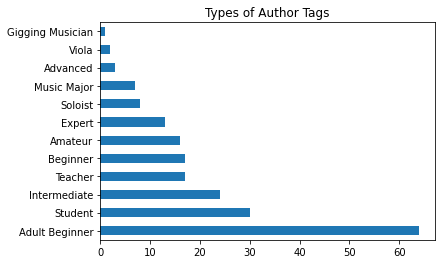

In [177]:
violinist_df['author_tag'].value_counts().plot(kind='barh')
plt.title("Types of Author Tags")

**Cello dataframe cleaning and EDA**

In [178]:
cello_df.head(3)

,Unnamed: 0,author_flair_text,created_utc,id,selftext,subreddit,title
0,0,NaN,1623949192,o220ak,"Hey everyone,\n\nI was thinking of playing the...",Cello,Difficulty of Halvorsen Passacaglia
1,1,NaN,1623938843,o1y3l8,Hi all! I've been taking lessons for about a m...,Cello,Self care tips?
2,2,NaN,1623898632,o1mpqb,Long story short my beloved Cello is now Firew...,Cello,"About to Purchase Hidersine Vivente, Need Pers..."


**Drop Unnamed: 0 column**

In [179]:
cello_df.drop('Unnamed: 0', axis=1, inplace=True)

**Rename the columns**

In [180]:
rename_columns_dict = {
    'id':'author_id',
    'created_utc' : 'posted_on',
    'author_flair_text': 'author_tag', 
    'title': 'post_title',
    'selftext':'post_description',
    'subreddit':'subreddit_name'}

In [181]:
cello_df.rename(columns=rename_columns_dict, inplace=True) 

**Change column order**

In [182]:
# Moving the subreddit column to the end for the eventual merge with the Cello dataframe
# This will be the y_value
cello_df = cello_df[['author_id','posted_on','author_tag','post_title','post_description','subreddit_name']]

**Convert unix/epoch time to a regular time stamp in UTC**

In [183]:
cello_df['posted_on']=pd.to_datetime(cello_df['posted_on'], unit='s')
cello_df.head(3)

,author_id,posted_on,author_tag,post_title,post_description,subreddit_name
0,o220ak,2021-06-17 16:59:52,NaN,Difficulty of Halvorsen Passacaglia,"Hey everyone,\n\nI was thinking of playing the...",Cello
1,o1y3l8,2021-06-17 14:07:23,NaN,Self care tips?,Hi all! I've been taking lessons for about a m...,Cello
2,o1mpqb,2021-06-17 02:57:12,NaN,"About to Purchase Hidersine Vivente, Need Pers...",Long story short my beloved Cello is now Firew...,Cello


**check data types**

In [184]:
cello_df.dtypes

author_id                   object
posted_on           datetime64[ns]
author_tag                  object
post_title                  object
post_description            object
subreddit_name              object
dtype: object

**plot author_tag to check the type of tags**

Text(0.5, 1.0, 'Types of Author Tags')

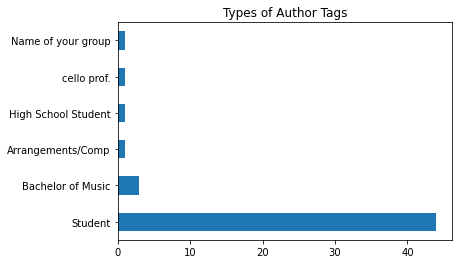

In [185]:
cello_df['author_tag'].value_counts().plot(kind='barh');
plt.title("Types of Author Tags")

**Merge both dataframes**

In [195]:
reddit_data = pd.concat([violinist_df,cello_df])

In [198]:
#reset the index
reddit_data.reset_index(drop=True , inplace=True)

In [199]:
# check random row 'title'
reddit_data['post_title'][4]

'Question (as a beginner)'

In [200]:
#display the first five rows
reddit_data.head(3)

,author_id,posted_on,author_tag,post_title,post_description,subreddit_name
0,o24eoj,2021-06-17 18:41:15,Advanced,"Ysaÿe violin concerto in E minor, the first mo...",[https://www.youtube.com/watch?v=PONbtxcPcKQ](...,violinist
1,o23xyv,2021-06-17 18:21:58,NaN,Video performance examples with great vibrato,I've been struggling with my vibrato and am lo...,violinist
2,o20e4w,2021-06-17 15:48:10,Adult Beginner,Counting time (6/8),My current rhythm exercise is in 6/8 time.\n\n...,violinist


In [201]:
# Check shape of the dataframe
print(f'Shape of Reddit data  dataframe: {reddit_data.shape}')

Shape of Reddit data  dataframe: (2087, 6)


**check data types**

In [202]:
reddit_data.dtypes

author_id                   object
posted_on           datetime64[ns]
author_tag                  object
post_title                  object
post_description            object
subreddit_name              object
dtype: object

**Binarize the subreddit column\
Violinist = 1 and Cello = 0**

In [203]:
reddit_data['subreddit_name'] = reddit_data['subreddit_name'].map(lambda x: 1 if x == 'violinist'else 0)

In [204]:
#display the first five rows
reddit_data.head(5)

,author_id,posted_on,author_tag,post_title,post_description,subreddit_name
0,o24eoj,2021-06-17 18:41:15,Advanced,"Ysaÿe violin concerto in E minor, the first mo...",[https://www.youtube.com/watch?v=PONbtxcPcKQ](...,1
1,o23xyv,2021-06-17 18:21:58,NaN,Video performance examples with great vibrato,I've been struggling with my vibrato and am lo...,1
2,o20e4w,2021-06-17 15:48:10,Adult Beginner,Counting time (6/8),My current rhythm exercise is in 6/8 time.\n\n...,1
3,o1vxwd,2021-06-17 12:22:01,NaN,I’m interested in picking up violin,"Hello everyone, as you can tell by the title I...",1
4,o1rmpe,2021-06-17 07:49:56,NaN,Question (as a beginner),"When the score says Sul G, Sul D, IVeme chord,...",1


In [205]:
#display the last five rows
reddit_data.tail(5)

,author_id,posted_on,author_tag,post_title,post_description,subreddit_name
2082,jmsjwd,2020-11-02 18:00:04,NaN,Can someone provide a sound file or video of j...,[removed],0
2083,jms9vh,2020-11-02 17:46:46,NaN,Double bass tuner for C string on cello?,"I have a really cheap cello, and there is no w...",0
2084,jmmj7y,2020-11-02 12:28:52,NaN,Buying in Boston area,"Hi all, adult recent learner looking to buy my...",0
2085,jm7dux,2020-11-01 18:38:33,NaN,Injuries in the workforce?,How often do injuries happen to those who are ...,0
2086,jm04c7,2020-11-01 10:24:17,NaN,So here is my attempt on Bach Suite(s)...,Don't know what came across my head to record ...,0


**Removing special characters , Tokenizing & stemming**

In [206]:
p_stemmer = PorterStemmer() # Instantiate PortStemmer
tokenizer = RegexpTokenizer(pattern=r'\w+') #collect words only
words = list(map(lambda x: x.lower(), reddit_data['post_title'])) #convert words in string to lowercase
tokenized_words = [tokenizer.tokenize(x) for x in words]  #convert one long string into a list of strings
clean_column_list = []
for word_list in tokenized_words:
    ##itearate each row
    cleanlist = []
    for word in word_list:
        ##itearate each word in row
        if word not in stopwords.words('english'): #removing  stop words
            cleanlist.append(p_stemmer.stem(word)) #using stemmer take words and attempt to return a base form of the word
    ##convert each clean row list to string and append to main list         
    clean_column_list.append((" ").join(cleanlist))

In [207]:
# Place new lists of stemmed words into the 'title' column in the final dataframe
reddit_data['post_title'] = clean_column_list
# Check to see that the 'title' column is how it should look
reddit_data[['post_title']].head()

,post_title
0,ysaÿe violin concerto e minor first movement l...
1,video perform exampl great vibrato
2,count time 6 8
3,interest pick violin
4,question beginn


In [208]:
# create a csv of the finalized dataframe
reddit_data.to_csv('../data/reddit_data.csv',index=False)